<a target="_blank" href="https://colab.research.google.com/github/avakanski/Fall-2022-Python-Programming-for-Data-Science/blob/main/Lectures/Theme%203%20-%20Model%20Engineering%20Pipelines/Lecture%2020%20-%20Language%20Models%20with%20Hugging%20Face/Lecture%2020%20-%20Language%20Models%20with%20Hugging%20Face.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a name='section0'></a>
# Lecture 20 Language Models with Hugging Face

- [20.1 Introduction to Hugging Face](#section1)
- [20.2 Hugging Face Pipelines](#section2)
- [20.3 Pipelines for NLP Tasks](#section3)
    - [20.3.1 Sentiment Analysis](#section3-1)
    - [20.3.2 Question Answering](#section3-2)
    - [20.3.3 Machine Translation](#section3-3)
    - [20.3.4 Text Summarization](#section3-4)
    - [20.3.5 Text Generation](#section3-5)
    - [20.3.6 Named Entity Recognition](#section3-6)
    - [20.3.7 Zero-shot Classification](#section3-7)
    - [20.3.8 Mask Filling](#section3-8)
- [20.4 Tokenizers](#section4) 
- [20.5 Datasets](#section5)    
- [20.6 Models](#section6) 
- [References](#section10)





<a name='section1'></a>

# 20.1 Introduction to Hugging Face

***Hugging Face*** ([link](https://huggingface.co/)) is a platform for Machine Learning and AI created in 2016, with the aim to "build, train, and deploy state of the art models powered by the reference open source in machine learning". Since then, Hugging Face has established itself as the main source for NLP and other Machine Learning tasks, providing open access to over 20,000 pre-trained models, datasets, and pertinent tools and resources. Hugging Face focuses on community-building around open-source machine learning tools and data. They also developed a [course](https://huggingface.co/course/chapter1/1) on how to use their libraries for various tasks. Also note that while open access is provided to the core NLP libraries, Hugging Face also offers pricing options for access to AutoNLP libraries.

<img src='https://raw.githubusercontent.com/avakanski/Fall-2022-Python-Programming-for-Data-Science/main/Lectures/Theme%203%20-%20Model%20Engineering%20Pipelines/Lecture%2020%20-%20Language%20Models%20with%20Hugging%20Face/imges/hf_icon.png' width=450px/>


Hugging Face initially focused on Transformer Networks and NLP, while recently they have expanded their libraries and tools to cover machine learning models and tasks, in general. State-of-the-art Transformer Networks are very large models, and hence, training such models from scratch is expensive and not affordable for many organizations. For example, the cost of training the GPT-3 model is estimated to USD $12 million. Providing access to pre-trained models for transfer learning and fine-tuning to specific tasks by Hugging Face has been a significant resourse.

The core Hugging Face libraries include Transformer models, Tokenizers, Datasets, and Accelerate. Accelerate library enables distributed training with hardware acceleration devices, such as using multiple GPUs, or cloud accelerators with TPUs. In addition to these core libraries, Hugging Face provides various community resources, which include a platform for sharing models, code versioning, Spaces allow sharing apps developed with Hugging Face libraries and browsing apps created by others, etc. 

<img src='https://raw.githubusercontent.com/avakanski/Fall-2022-Python-Programming-for-Data-Science/main/Lectures/Theme%203%20-%20Model%20Engineering%20Pipelines/Lecture%2020%20-%20Language%20Models%20with%20Hugging%20Face/imges/hf_libraries.png' width=400px/>

The key characteristics of these libraries include:
- Ease of use and simplicity, where downloading and using state-of-the-art NLP models can be done with a few lines of code.
- Flexibility, since all models are implemented either using the `nn.Module` in PyTorch or `tf.keras.Model` in TensorFlow, allowing for easy model integration with these popular frameworks.


<a name='section2'></a>

# 20.2 Hugging Face Pipelines

Hugging Face uses ***Pipelines*** as an API that through the `pipeline()` method allows performing inference over a variety of tasks.

The `pipeline()` method has the following syntax: 

```
from transformers import pipeline

# Pipeline to use a default model & tokenizer for a given task
pipeline("<task-name>")

# Pipeline to use an existing or custom model
pipeline("<task-name>", model="<model_name>")

# Pipeline to use an existing or custom model and tokenizer
pipeline('<task-name>', model='<model name>', tokenizer='<tokenizer_name>')
```

Among the currently available task pipelines are:

- sentiment-analysis
- question-answering
- translation
- summarization
- text-generation
- ner (named entity recognition)
- zero-shot-classification
- fill-mask

<a name='section3'></a>

# 20.3 Pipelines for NLP Tasks

In this section, we will examine examples on how to use the `pipeline("<task-name>")` method with different NLP tasks. As we mentioned, if we don't provide the names for the used model and tokenizer, the pipeline will assign a default language model and tokenizer to complete the task, and it will download the model parameters and other required elements to perform text generation.

To use the Transformer library by Hugging Face we will need to first install it, since it is not preinstalled in Google Colab. 

In [ ]:
!pip install transformers datasets

<a name='section3-1'></a>

### 20.3.1 Sentiment Analysis

The first example will show how to use `pipeline("<task-name>")` for sentiment analysis, and therefore, we will use `"sentiment analysis"` as task name. 

When the cell is executed, the pipeline will select a default pretrained model for sentiment analysis in English, it will download the model and the related tokenizer, and it will instantiate a text classifier object. 

We saw examples of sentiment analysis in the previous lectures, where the goal was to classify the sentiment in input text as positive or negative.

In [3]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In the next cell, the classifier is applied to a sentence. The output is the predicted label and the confidence score. 

In [4]:
classifier("I fully understand what you are saying.")

[{'label': 'POSITIVE', 'score': 0.9996806383132935}]

The pipeline allows to pass multiple sentences, and it will return a sentiment label and confidence score for each sentence. 

In [5]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

<a name='section3-2'></a>

### 20.3.2 Question Answering

This pipeline answers questions using information from a given context. Such pipeline can be very useful when we are dealing with long text data and finding answers to questions in the document can take time. 

In [6]:
question_answerer = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

We can provide inputs to the pipeline as a dictionary with `question` and `context` as keys. The model extracts information from the provided context and returns a dictionary with a confidence score, start and end characters of the answer in the context, and the answer. Also note that the model does not generate new text to answer the questions, but instead it searches for the answer in the supplied context sequence.

In [7]:
input_1 = {
    "question" : "What didn't cross the street?",
    "context" : "The animal didn't cross the street because it was too tired",
    }

question_answerer(input_1)

{'score': 0.7553661465644836, 'start': 0, 'end': 10, 'answer': 'The animal'}

In [8]:
input_2 = {
    "question" : "Why the animal didn't cross the street?",
    "context" : "The animal didn't cross the street because it was too wide",
    }

question_answerer(input_2)

{'score': 0.6076129078865051,
 'start': 43,
 'end': 58,
 'answer': 'it was too wide'}

<a name='section3-3'></a>

### 20.3.3 Machine Translation

For machine translation, we can provide source and target languages in the pipeline, as in the next cell where the task `"translation_en_to_fr"` is to translate text from English to French. Although this pipeline can work with several languages, most often, machine translation requires to specify the name of the used language model, and only for several special cases it can work by specifying only the task name.

In [9]:
translator = pipeline("translation_en_to_fr")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5_fast.py:166: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [10]:
translator("I am a student")

[{'translation_text': 'Je suis un étudiant'}]

In [11]:
translator("Peyton Manning became the first quarterback ever to lead two different teams to multiple Super Bowls.")

[{'translation_text': 'Peyton Manning est devenu le premier quarterback à conduire deux équipes différentes à plusieurs Super Bowls.'}]

<a name='section3-4'></a>

### 20.3.4 Text Summarization

Text summarization reduces a longer text into a shorter summary.

In [12]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [13]:
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

Specifying the `min_length` and `max_length` arguments allows to control the length of the summary. 

In [14]:
summarizer(
    """
    Flooding on the Yangtze river remains serious although water levels on parts of the river decreased
    today, according to the state headquarters of flood control and drought relief .
    """, min_length=8, max_length=20)

[{'summary_text': ' Flooding on the Yangtze river remains serious although water levels on parts of the'}]

In [15]:
summarizer(
    """BAGHDAD -- Archaeologists in northern Iraq last week unearthed 2,700-year-old rock carvings featuring war scenes and trees from the Assyrian Empire, an archaeologist said Wednesday.

    The carvings on marble slabs were discovered by a team of experts in Mosul, Iraq’s second-largest city, who have been working to restore the site of the ancient Mashki Gate, which was bulldozed by Islamic State group militants in 2016.

    Fadhil Mohammed, head of the restoration works, said the team was surprised by discovering “eight murals with inscriptions, decorative drawings and writings.”

    Mashki Gate was one of the largest gates of Nineveh, an ancient Assyrian city of this part of the historic region of Mesopotamia.

    The discovered carvings show, among other things, a fighter preparing to fire an arrow while others show palm trees.
    """)  

[{'summary_text': ' The carvings on marble slabs were discovered by a team of experts in Mosul, Iraq’s second-largest city . They have been working to restore the site of the ancient Mashki Gate, which was bulldozed by Islamic State group militants in 2016 . Mashki gate was one of the largest gates of Nineveh, an ancient Assyrian city of this part of Mesopotamia .'}]

<a name='section3-5'></a>

### 20.3.5 Text Generation

In this example, we will use the `"text-generation"` pipeline to generate text based on a provided prompt. 

In [16]:
generator = pipeline("text-generation")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


Now let’s provide a prompt text to the generator object, and the generator will continue the text. Note that text generation involves randomness, so some of the outputs will not be perfect. And admittedly, this is one of the most difficult NLP tasks. 

In [17]:
outputs_1 = generator("In this course, we will teach you how to")

print(outputs_1[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1301: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In this course, we will teach you how to handle your business in the online world. This is a basic introduction to the internet, and is well organized. It will show you how to create your own web site for your website, and how to


In [18]:
outputs_2 = generator("Niagara Falls is a city located in")

print(outputs_2[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Niagara Falls is a city located in western Ontario, Canada, one of several cities within the province that is home to Niagara Falls.


In [19]:
outputs_3 = generator("Niagara Falls is a famous world attractation")

print(outputs_3[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Niagara Falls is a famous world attractation for kayak enthusiasts. The location was discovered by the Swedish scientist, Karl Hjalmarsson along with his wife, Maryla, who has found that the lake is home to over 3 million species


<a name='section3-6'></a>

### 20.3.6 Named Entity Recognition

Named Entity Recognition (NER), also known as named entity tagging, is a task of identifying parts of the input that represent entities. Examples of entities are:
- Location (LOC) 
- Organizations (ORG)
- Persons (PER)
- Miscellaneous entities (MISC)

In [20]:
ner = pipeline("ner", grouped_entities=True)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:136: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  "`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to"


In [21]:
text_1 = "Abraham Lincoln was a president who lived in the United States."

print(ner(text_1))

[{'entity_group': 'PER', 'score': 0.9988935, 'word': 'Abraham Lincoln', 'start': 0, 'end': 15}, {'entity_group': 'LOC', 'score': 0.99965084, 'word': 'United States', 'start': 49, 'end': 62}]


Or, we can use Pandas to display the output.

In [22]:
import pandas as pd

pd.DataFrame(ner(text_1))

,entity_group,score,word,start,end
0,PER,0.998893,Abraham Lincoln,0,15
1,LOC,0.999651,United States,49,62


In [23]:
text_2 = """BAGHDAD -- Archaeologists in northern Iraq last week unearthed 2,700-year-old rock carvings featuring war scenes and trees from the Assyrian Empire, an archaeologist said Wednesday.

    The carvings on marble slabs were discovered by a team of experts in Mosul, Iraq’s second-largest city, who have been working to restore the site of the ancient Mashki Gate, which was bulldozed by Islamic State group militants in 2016.

    Fadhil Mohammed, head of the restoration works, said the team was surprised by discovering “eight murals with inscriptions, decorative drawings and writings.”

    Mashki Gate was one of the largest gates of Nineveh, an ancient Assyrian city of this part of the historic region of Mesopotamia.

    The discovered carvings show, among other things, a fighter preparing to fire an arrow while others show palm trees.
    """

pd.DataFrame(ner(text_2))

,entity_group,score,word,start,end
0,LOC,0.434805,BA,0,2
1,LOC,0.999473,Iraq,38,42
2,MISC,0.893630,Assyrian,132,140
3,LOC,0.782092,Empire,141,147
4,LOC,0.999238,Mosul,256,261
5,LOC,0.999156,Iraq,263,267
6,LOC,0.971527,Mashki Gate,348,359
7,ORG,0.997262,Islamic State,384,397
8,PER,0.999300,Fadhil Mohammed,428,443
9,LOC,0.974939,Mashki Gate,592,603


<a name='section3-7'></a>

### 20.3.7 Zero-shot Classification

Zero-shot classification is a task to classify text documents, where the term 
*zero-shot* classification refers to tasks for which a language model has not been trained. I.e., the model was not trained to classify documents using the provided type of labels in the next example.

In [24]:
classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

The pipeline allows us to list `candidate labels` to be used for the classification. For this example, the model returned confidence scores for each category, and the highest probability was assigned to the "sports" category. 

In [25]:
classifier(
    "Peyton Manning became the first quarterback ever to lead two different teams to multiple Super Bowls.",
    candidate_labels=["education", "politics", "business", "sports"],
)

{'sequence': 'Peyton Manning became the first quarterback ever to lead two different teams to multiple Super Bowls.',
 'labels': ['sports', 'business', 'education', 'politics'],
 'scores': [0.9866245985031128,
  0.006729829125106335,
  0.0034621916711330414,
  0.0031833709217607975]}

<a name='section3-8'></a>

### 20.3.8 Mask Filling

The pipeline with the `fill-mask` task is used to fill in blanks in an input text. 

In [26]:
mask_filling = pipeline("fill-mask")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

We can provide the `top_k` argument to indicate the number of returned answers.

In [27]:
mask_filling("Abraham Lincoln was a <mask> who lived in the United States.", top_k=5)

[{'score': 0.3327259123325348,
  'token': 3661,
  'token_str': ' Democrat',
  'sequence': 'Abraham Lincoln was a Democrat who lived in the United States.'},
 {'score': 0.18091131746768951,
  'token': 1172,
  'token_str': ' Republican',
  'sequence': 'Abraham Lincoln was a Republican who lived in the United States.'},
 {'score': 0.03390636667609215,
  'token': 16495,
  'token_str': ' Jew',
  'sequence': 'Abraham Lincoln was a Jew who lived in the United States.'},
 {'score': 0.028415391221642494,
  'token': 24156,
  'token_str': ' Presbyterian',
  'sequence': 'Abraham Lincoln was a Presbyterian who lived in the United States.'},
 {'score': 0.02462906762957573,
  'token': 11593,
  'token_str': ' physician',
  'sequence': 'Abraham Lincoln was a physician who lived in the United States.'}]

In [28]:
mask_filling("Flooding on the Yangtze river remains serious although <mask> levels on parts of the river decreased today.", top_k=2)

[{'score': 0.24890927970409393,
  'token': 514,
  'token_str': ' water',
  'sequence': 'Flooding on the Yangtze river remains serious although water levels on parts of the river decreased today.'},
 {'score': 0.12597253918647766,
  'token': 11747,
  'token_str': ' oxygen',
  'sequence': 'Flooding on the Yangtze river remains serious although oxygen levels on parts of the river decreased today.'}]

<a name='section4'></a>

# 20.4 Tokenizers


***Tokenizers*** library in Hugging Face is used to split input text data into tokens (e.g., words, characters, N-grams), and map the tokens to integers. When we use a pretrained model from Hugging Face for a downstream task, our text data needs to be preprocessed in the same way as the training data used with the model. Therefore, we will need to download the tokenizer for that specific model.

Let's consider the model `"distilbert-base-uncased"`, which is a version of the BERT transformer model, which takes case-insensitive English test as input data. Next, we will download the tokenizer for this model by using the `AutoTokenizer` class and its method `from_pretrained()`. 

In this case, `AutoTokenizer` will download the corresponding tokenizer for the model that we specified to be `"distilbert-base-uncased"`. We can also specify the tokenizer name for the model that we wish to use. For instance, for the BERT model, Hugging Face has a BertTokenizer that can be directly imported from the `transformers` package.

In [29]:
from transformers import AutoTokenizer

model = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Let's now use the `tokenizer` to convert sentences into a sequence of integers, and display the output.

The ouput of the tokenizer is a dictionary consisting of two key-value pairs:
- `input_ids`, a list of integers, where each index identifies a token. The indexing is based on the vocabulary of the training data that was used to train the model `"distilbert-base-uncased"`.
- `attention_mask`, a list of 1's or 0's, to indicate padding of the text sequence. This sentence does not have padding, since all elements have an attention mask of 1's. 

In [30]:
output_tokens_1 = tokenizer('Tokenizing text is easy.')
print(output_tokens_1)

{'input_ids': [101, 19204, 6026, 3793, 2003, 3733, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


One thing to note is that the above output has 8 tokens, although the input sentence has 4 words + the period mark. To understand better how the tokenization was performed, in the next cell, we used the method `covert_ids_to_tokens()` to obtain the text for each token. Now we can see that the tokenizer places special tokens at the beginning and end of each sequence. `[CLS]` is placed at the beginning (it stands for Classification), and `[SEP]` is placed at the end of the sequence (it stands for Separate).

Also note that the gerund verb "tokenizing" is split into `'token'` and `'##izing'`. Using two tokens for the word allows to work with smaller vocabularies. I.e., instead of considering `token` and `tokenization` as two different words, by splitting the word into the root `token` and the suffix `ization`, the model will use two tokens that have a distinct semantic meaning. This approach of decomposing long words into subwords is especially efficient with some languages where one can form very long words by chaining simple subwords.

In [31]:
tokenizer.convert_ids_to_tokens(output_tokens_1.input_ids)

['[CLS]', 'token', '##izing', 'text', 'is', 'easy', '.', '[SEP]']

Most tokenizers in Hugging Face assign integers for the special tokens between 100 and 103. 

These special tokens include:
- \[PAD\], padding.
- \[UNK\], unknown token.
- \[CLS\], sequence beginning.
- \[SEP\], sequence end.
- \[MASK\], masked tokens. 

In [32]:
tokenizer.convert_ids_to_tokens([0, 100, 101, 102, 103])

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']

One more simple example is provided next. We can see that the word 'Transformer' is tokenized as 'transform' + '##er'.

In [33]:
output_tokens_2 = tokenizer('Using a Transformer network in Hugging Face is simple')
print(output_tokens_2)

{'input_ids': [101, 2478, 1037, 10938, 2121, 2897, 1999, 17662, 2227, 2003, 3722, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [34]:
tokenizer.convert_ids_to_tokens(output_tokens_2.input_ids)

['[CLS]',
 'using',
 'a',
 'transform',
 '##er',
 'network',
 'in',
 'hugging',
 'face',
 'is',
 'simple',
 '[SEP]']

Tokenizers can be applied to multiple text sequences. The argument `padding=True` is used below to pad the sequences to the longest sequence. Note below that 0 tokens are added to pad the second sentence.

In [35]:
text_3 =  ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]

output_tokens_3 = tokenizer(text_3, padding=True)

In [36]:
print(output_tokens_3)

{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 1045, 5223, 2023, 2061, 2172, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]]}


The output is more readable if we print it line by line.

In [37]:
print("Input IDs")
for item in output_tokens_3.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_3.attention_mask:
    print(item)

Input IDs
[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
[101, 1045, 5223, 2023, 2061, 2172, 999, 102, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


Note also that each sequence of tokens begins with the token 101 ('[CLS]') and ends with the token 102 ('[SEP]').

If `max_length` is provided, the tokenizer will truncate longer sentences to the specified length, as in the example in the next cell.

In [38]:
output_tokens_4 = tokenizer(text_3, padding=False, max_length=10)

print("Input IDs")
for item in output_tokens_4.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_4.attention_mask:
    print(item)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Input IDs
[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 102]
[101, 1045, 5223, 2023, 2061, 2172, 999, 102]
Attention Mask
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1]


The Tokenizers library also allows to train new tokenizers from scratch. For instance, if a large corpus of text is available in another language than English, a new tokenizer will need to be trained to efficiently deal with the differences in the punctuation and use of spaces in that language.

<a name='section5'></a>

# 20.5 Datasets

Hugging Face provides access to a large number of datasets. If you wish to check all datasets please follow this [link](https://huggingface.co/datasets). As well as, to see all available datasets in Hugging Face, we can import `list_datasets`.

In [39]:
from datasets import list_datasets

all_datasets = list_datasets()

In [40]:
print('Number of datasets in Hugging Face:', len(all_datasets))

Number of datasets in Hugging Face: 12642


In [41]:
print('Display the first 10 datasets:', '\n'.join(all_datasets[:10]))

Display the first 10 datasets: acronym_identification
ade_corpus_v2
adversarial_qa
aeslc
afrikaans_ner_corpus
ag_news
ai2_arc
air_dialogue
ajgt_twitter_ar
allegro_reviews


Let's load the Emotions dataset. It contains Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. We can just use 'load_dataset()` to accomplish that.

In [42]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

We can see in the next cell that `emotions` dataset is a dictionary object that is split into training, validation, and test data sets, consisting of 16,000, 2,000, and 2,000 messages, respectively. 

In [43]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

The first and second training samples are shown next. They contain the text and the corresponding emotion label. 

In [44]:
emotions['train'][0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [45]:
emotions['train'][1]

{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'label': 0}

The order of the labels for the emotion categories are shown in the next cell. 

In [46]:
emotions['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

Hugging Face also allows to use the `set_format()` method with datasets, and to define the format of the data. For instance, by setting the type to Pandas, we can obtain the data as Pandas DataFrames.

In [47]:
emotions.set_format(type='pandas')
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


We can use a bar plot to plot the number of values in each category.

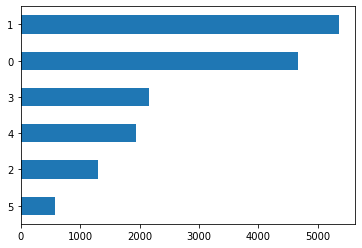

In [48]:
import matplotlib.pyplot as plt

df["label"].value_counts(ascending=True).plot.barh()
plt.show()

### Apply a Tokenizer to a Dataset

Let's show next how we can use a tokenizer to convert the first 5 samples in the training dataset to sequences of tokens. 

In [49]:
emotions.set_format(type=None)

training_samples_5 = emotions["train"][:5]
training_samples_5

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

Let's extract only the text data, and not the labels. 

In [50]:
text_training_5 = training_samples_5['text']
text_training_5

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

Apply the tokenizer, and display the sequence of tokens. 

In [51]:
output_tokens_5 = tokenizer(text_training_5, padding=True)

print("Input IDs")
for item in output_tokens_5.input_ids:
    print(item)

print("Attention Mask")
for item in output_tokens_5.attention_mask:
    print(item)

Input IDs
[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]
[101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0]
[101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<a name='section6'></a>

# 20.6 Models

### Importing a Pretrained Model

Instead of using a default model for a task, we can also select a language model from the many available in Hugging Face. Let's use GPT-2 language model, and we will also need to use the corresponding tokenizer for GPT-2.

In [52]:
from transformers import GPT2Tokenizer
from transformers import GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

model = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id = tokenizer.eos_token_id)

Now, let's input one sentence, and first preprocess it with the tokenizer to *encode* it into a sequence of integers. Next, we will use the GPT-2 model for text generation, to continue the input sentences. the *decode* method will convert the generated sequence by the model into text, here named `output_string`. 

In [53]:
input_string = "Yesterday I spent several hours in the library, studying"
input_tokens = tokenizer.encode(input_string, return_tensors = "pt")

output_greedy = model.generate(input_tokens, max_length=64)

output_string = tokenizer.decode(output_greedy[0], skip_special_tokens=True)

print(f"Output sequence: {output_string}")

Output sequence: Yesterday I spent several hours in the library, studying the books, and I was amazed at how much I had learned. I was amazed at how much I had learned. I was amazed at how much I had learned. I was amazed at how much I had learned. I was amazed at how much I had learned.


You can notice that the generated text sequence is not the best, since after the initial sequence of words, the model got stuck into a loop, and began repeating the same sentence. One way to deal with repetitive text generation is to apply a beam search strategy, and combine it with a penalty term for repeating the same  words. Beam search examines multiple probable solutions (beams) for the generated text, which is set by the argument `num_beams=32`. Based on different solutions, the algorithm tries to improve the generated output text by the model. 

In [54]:
output_beam = model.generate(input_tokens, max_length=64, num_beams=32, \
       no_repeat_ngram_size=2, early_stopping=True)

output_string = tokenizer.decode(output_beam[0], skip_special_tokens=True)

print("Output sequence:\n", output_string)

Output sequence:
 Yesterday I spent several hours in the library, studying all the books I could get my hands on, and trying to figure out what I wanted to do with them. I didn't know what to expect, but I did know that it was going to be a lot of fun.

When I got home, I


### Fine-tuning a Pretrained Model to the Emotions Dataset

The next section demonstrates how to use a pretrained model and tokenizers in Hugging Face, and fine-tune the model to a dataset. We will again use the Emotions dataset.

Let's first download the tokenizer for the `"distilbert-base-uncased"` model.

In [55]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

The following code tokenizes the emotions dataset. It is common to use the `Dataset.map()` method in Hugging Face for tokenization, which applies a function on each sample in the dataset. Therefore, we first define a function `tokenize` that is used in the `Dataset.map()` method. Using the option `batched=True` in the `map()` method will apply the tokenization to a batch of input sequences instead to each text sequence, which will speed up the tokenization. And, as we learned in the previous section, `tokenize` returns a dictionary with keys `input_ids`, `attention_mask`, and `token_type_ids`. 

In [56]:
def tokenize(rows):
    return tokenizer(rows['text'], padding="max_length", truncation=True)

emotions.set_format(type=None)

tokenized_datasets = emotions.map(tokenize, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [57]:
tokenized_train_dataset = tokenized_datasets["train"]
tokenized_eval_dataset = tokenized_datasets["test"]

`DefaultDataCollator` in Hugging Face will transform the dataset into TensorFlow type data, which we will use to train a neural network model defined in TensorFlow. In other words, the collate function will convert the tokenized input samples into TensorFlow tensors, and concatenate the tensors to create batches for training the model. 

In [58]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator(return_tensors="tf")

The train and validation datasets are defined in the next cell, where the `columns` and `label_col` define the text and labels in the datasets. 

In [59]:
tf_train_dataset = tokenized_train_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    label_cols=["label"],
    shuffle=True,
    collate_fn=data_collator,
    batch_size=8)

tf_validation_dataset = tokenized_eval_dataset.to_tf_dataset(
    columns=["attention_mask", "input_ids"],
    label_cols=["label"],
    shuffle=False,
    collate_fn=data_collator,
    batch_size=8)

Next, we will load the distilbert model for classification. Hugging Face Transformers library provides an `AutoModel` class which also has a `from_pretrained()` method that can be used to load a pretrained checkpoint. Hugging Face offers several types of AutoModel instances, and since we will need a model to perform classification of Twitter messages into classes, and the dataset is preprocessed into TesorFlow data type, we will use the model `TFAutoModelForSequenceClassification`, 

After the model is defined, compile it and re-train using our dataset.

In [60]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=6) 

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [61]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy())

model.fit(tf_train_dataset, validation_data=tf_validation_dataset, epochs=5)

Epoch 1/5
2000/2000 [==============================] - 153s 71ms/step - loss: 0.3678 - sparse_categorical_accuracy: 0.8691 - val_loss: 0.1936 - val_sparse_categorical_accuracy: 0.9225
Epoch 2/5
2000/2000 [==============================] - 140s 70ms/step - loss: 0.1517 - sparse_categorical_accuracy: 0.9335 - val_loss: 0.1405 - val_sparse_categorical_accuracy: 0.9275
Epoch 3/5
2000/2000 [==============================] - 140s 70ms/step - loss: 0.1292 - sparse_categorical_accuracy: 0.9399 - val_loss: 0.1999 - val_sparse_categorical_accuracy: 0.9210
Epoch 4/5
2000/2000 [==============================] - 141s 70ms/step - loss: 0.1051 - sparse_categorical_accuracy: 0.9492 - val_loss: 0.1570 - val_sparse_categorical_accuracy: 0.9315
Epoch 5/5
2000/2000 [==============================] - 141s 70ms/step - loss: 0.0900 - sparse_categorical_accuracy: 0.9611 - val_loss: 0.1466 - val_sparse_categorical_accuracy: 0.9280


<a name='section10'></a>

# References

1. Hugging Face Course, available at [https://huggingface.co/course/chapter1/1](https://huggingface.co/course/chapter1/1).
2. Applications of Deep Neural Networks, Course at Washington University in St. Louis, Jeff Heaton, available at [https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_11_01_huggingface.ipynb](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_11_01_huggingface.ipynb).
3. Getting Started with Hugging Face Transformers for NLP, Exxact Blog, available at [https://www.exxactcorp.com/blog/Deep-Learning/getting-started-hugging-face-transformers](https://www.exxactcorp.com/blog/Deep-Learning/getting-started-hugging-face-transformers).
4. An Introduction to Using Transformers and Hugging Face, Zoumana Kelta, available at [https://www.datacamp.com/tutorial/an-introduction-to-using-transformers-and-hugging-face](https://www.datacamp.com/tutorial/an-introduction-to-using-transformers-and-hugging-face).

[BACK TO TOP](#section0)